# Machine Learning for Regression

## 2.2 - Data Preparation

In [1]:
# Imports
import numpy as np
import pandas as pd

In [2]:
# Fetch the data
csv_data_location = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [3]:
df = pd.read_csv(csv_data_location)

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
# Make data consistent...
# Remove spaces, make lower case

df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
df.columns.str.lower().str.replace(" ", "_")

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
# We want to do this for all the string columns
df.make = df.make.str.lower()

In [11]:
df.make

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [12]:
# We are interested in the object fields for strings
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [13]:
# Get all the string columns
string_columns = df.dtypes[df.dtypes == "object"].index
print(f"Option 1: {string_columns}")

# Alternative way to select string columns
string_columns = df.select_dtypes('object').columns 
print(f"Option 2: {string_columns}")

Option 1: Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')
Option 2: Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')


In [14]:
for col in string_columns:
    df[col] = df[col].str.lower()

In [15]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1 series m,2011,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,"factory tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 - Exploratory Data Analysis

In [16]:
for col in df.columns:
    print(f"Column Name: {col}")
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()
    

Column Name: make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

Column Name: model
['1 series m' '1 series' '100' '124 spider' '190-class']
914

Column Name: year
[2011 2012 2013 1992 1993]
28

Column Name: engine_fuel_type
['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/e85)' 'diesel']
10

Column Name: engine_hp
[335. 300. 230. 320. 172.]
356

Column Name: engine_cylinders
[ 6.  4.  5.  8. 12.]
9

Column Name: transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

Column Name: driven_wheels
['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']
4

Column Name: number_of_doors
[ 2.  4.  3. nan]
3

Column Name: market_category
['factory tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

Column Name: vehicle_size
['compact' 'midsize' 'large']
3

Column Name: vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4d

### Distribution of Price

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

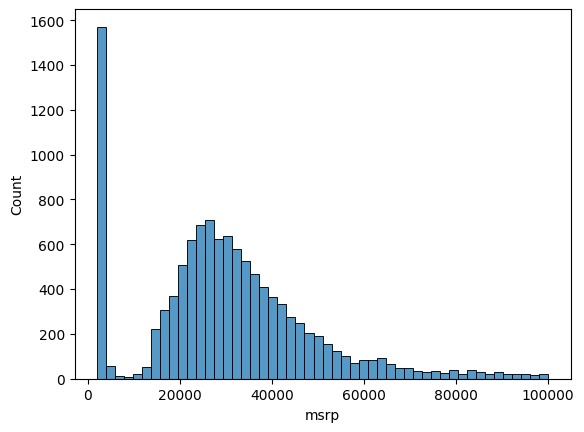

In [18]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

# Bins sets the number of bars in the width

In [19]:
df.msrp.max()

np.int64(2065902)

Large values may confuse the model. We can use the log of the values to decrease them

In [20]:
# log1p adds 1 to each value then finds the log. Protects against running log(0)
values = np.array([0, 1, 10, 100, 19241])
np.log1p(values)

array([0.        , 0.69314718, 2.39789527, 4.61512052, 9.86485067])

In [21]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

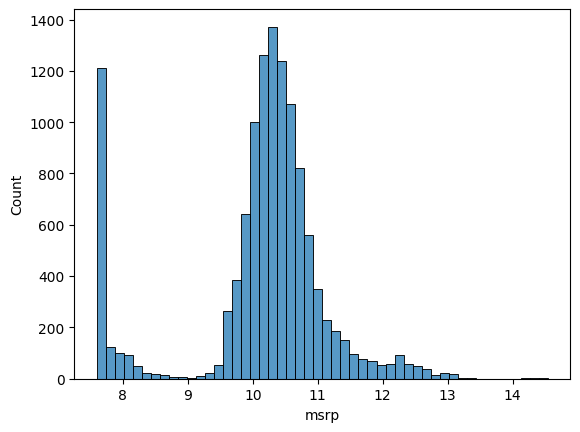

In [22]:
sns.histplot(price_logs, bins=50)

### Missing Values

In [23]:
# To find missing values:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

A lot of missing values for market_category. Might not be a useful variable when creating model

## 2.4 Setting up the Validation Framework

In [24]:
# Break the data into training, testing, and validation data

In [25]:
# Get the size:
n = len(df)
n

11914

In [26]:
# 60% Training, 20% validation, 20% test
n_val = int(n * 0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

print(f"Validation Length: {n_val}")
print(f"Test Length: {n_test}")
print(f"Training Length: {n_train}")

Validation Length: 2382
Test Length: 2382
Training Length: 7150


In [27]:
# Generate an array of shuffled indexes with the same length as the dataset. This helps make sure that any data that might be organised gets unorganised

idx = np.arange(n)
np.random.seed(2) # Can use a seed to get reproducable results
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [28]:
# Use the DataFrames iloc() function to split the data
X_val = df.iloc[idx[:n_val]]

In [29]:
X_test = df.iloc[idx[n_val:n_val + n_test]]

In [30]:
X_train = df.iloc[idx[n_val + n_test:]]

In [31]:
X_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular unleaded,148.0,4.0,manual,front wheel drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular unleaded,132.0,4.0,automatic,front wheel drive,4.0,hatchback,compact,4dr hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular unleaded,148.0,4.0,automatic,all wheel drive,4.0,hatchback,compact,4dr hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular unleaded,90.0,4.0,manual,rear wheel drive,3.0,NaN,large,passenger minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel (unleaded/e85),385.0,8.0,automatic,four wheel drive,4.0,flex fuel,large,crew cab pickup,21,15,5657,56260


In [32]:
X_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3292,nissan,cube,2014,regular unleaded,122.0,4.0,automatic,front wheel drive,4.0,NaN,compact,wagon,31,27,2009,19000
4239,suzuki,esteem,2001,regular unleaded,122.0,4.0,manual,front wheel drive,4.0,NaN,compact,wagon,32,24,481,14499
6937,tesla,model s,2016,electric,NaN,0.0,direct_drive,all wheel drive,4.0,"exotic,high-performance",large,sedan,100,91,1391,112000
1712,mazda,b-series pickup,2000,flex-fuel (unleaded/e85),143.0,6.0,manual,rear wheel drive,4.0,flex fuel,compact,extended cab pickup,21,16,586,3107
11742,cadillac,xt5,2017,premium unleaded (required),310.0,6.0,automatic,front wheel drive,4.0,"crossover,luxury",midsize,4dr suv,27,19,1624,44895


In [33]:
X_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8597,kia,rondo,2008,regular unleaded,162.0,4.0,automatic,front wheel drive,4.0,NaN,compact,wagon,26,19,1720,16395
6408,subaru,legacy,2016,regular unleaded,175.0,4.0,automatic,all wheel drive,4.0,NaN,midsize,sedan,36,26,640,24145
11241,hyundai,veloster,2016,regular unleaded,132.0,4.0,manual,front wheel drive,3.0,hatchback,compact,2dr hatchback,35,27,1439,18000
569,fiat,500,2017,premium unleaded (recommended),101.0,4.0,automatic,front wheel drive,2.0,hatchback,compact,2dr hatchback,33,27,819,15990
1659,lincoln,aviator,2005,premium unleaded (required),302.0,8.0,automatic,all wheel drive,4.0,luxury,midsize,4dr suv,16,11,61,43585


In [34]:
# Reset the indexes of the dataframes
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [35]:
y_train = np.log1p(X_train.msrp.values)
y_val = np.log1p(X_val.msrp.values)
y_test = np.log1p(X_test.msrp.values)

In [36]:
# Delete the MSRP co
del X_train["msrp"]
del X_val["msrp"]
del X_test["msrp"]

## 2.5 - Linear Regression
(Of regression, classification, ranking)
Model for predicting numbers.

g(X) ~= y

In [37]:
X_train.iloc[10]


make                        chevrolet
model                 trailblazer ext
year                             2004
engine_fuel_type     regular unleaded
engine_hp                       275.0
engine_cylinders                  6.0
transmission_type           automatic
driven_wheels        rear wheel drive
number_of_doors                   4.0
market_category                   NaN
vehicle_size                    large
vehicle_style                 4dr suv
highway_mpg                        18
city_mpg                           13
popularity                       1385
Name: 10, dtype: object

In [38]:
# take engine_hp, city_mpg, popularity

xi = [275, 13, 1385]

For a single entry:
$$x_i = [275, 13, 1385] $$
$$g(x_i) ≈ y_i $$
$$g(x_i) = W_0 + W_1.x_{i1} + W_2.x_{i2} + W_3.x_{i3} $$

$$g(x_i) = W_0 + \sum_{j=1}^{3} W_j.x_{ij}$$

In [39]:
w0 = 0
w = [1,2,3]

In [40]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n): 
        pred += pred + w[j] * xi[j]
    return pred


In [41]:
predicted_price = linear_regression(xi)

In [42]:
adjusted_pred = np.log1p(predicted_price)

print(f"Guess: {adjusted_pred}")
print(f"Actual: {y_train[10]}")

Guess: 8.576970395452099
Actual: 10.372584520889065


## 2.6 - Linear Regression: Vector Form

In [43]:
def dot(xi, w): 
    n = len(xi) 

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [44]:
def linear_regression(xi, w):
    xi = [1] + xi
    return dot(xi, w)

In [45]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]


In [46]:
X = [x1, x2, x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [47]:
w = [0.01, 0.04, 0.002]
w = [w0] + w

In [48]:
w

[0, 0.01, 0.04, 0.002]

In [49]:
X.dot(w)

array([5.21 , 6.382, 5.142])

## 2.7 Training a linear regression model

How do we come up with the W vector?

$ w = (X^TX)^{-1} . X^T . y $

In [50]:
X = [
    [   1,  148,   24, 1385],
    [   1,  132,   25, 2031],
    [   1,  453,   11,   86],
    [   1,  144,   11,   86],
    [   1,  831,   11,   212],
    [   1,  231,   17,   8116],
    [   1,  63,   5,   21],
    [   1,  635,   12,   526],
    [   1,  253,   15,   516],
]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86],
       [   1,  144,   11,   86],
       [   1,  831,   11,  212],
       [   1,  231,   17, 8116],
       [   1,   63,    5,   21],
       [   1,  635,   12,  526],
       [   1,  253,   15,  516]])

In [51]:
XTX = X.T.dot(X)
XTX # The Gram Matrix

array([[       9,     2890,      131,    12979],
       [    2890,  1480398,    38217,  3041263],
       [     131,    38217,     2247,   240368],
       [   12979,  3041263,   240368, 72515751]])

In [52]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 1.19881457e+00, -9.48985177e-04, -5.43141068e-02,
         5.26881953e-06],
       [-9.48985177e-04,  1.99040038e-06,  1.89540447e-05,
         2.35480120e-08],
       [-5.43141068e-02,  1.89540447e-05,  3.61673707e-03,
        -3.06208370e-06],
       [ 5.26881953e-06,  2.35480120e-08, -3.06208370e-06,
         2.20093870e-08]])

In [53]:
XTX.dot(XTX_inv) # Very close to the identity matrix

array([[ 1.00000000e+00, -3.20314112e-19, -5.00719292e-17,
         3.08247201e-19],
       [ 1.61999552e-13,  1.00000000e+00,  5.03866455e-14,
        -4.37410395e-17],
       [ 1.85184171e-14, -1.33812677e-17,  1.00000000e+00,
         3.00802575e-19],
       [ 1.68264299e-12, -9.52877989e-16,  7.70286879e-14,
         1.00000000e+00]])

In [54]:
y = [100, 200, 150, 250, 142, 125, 599, 125, 120]

In [55]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 5.80199228e+02, -3.89438592e-01, -1.66541686e+01, -7.98362298e-03])

In [56]:
w0 = w_full[0]
w0

np.float64(580.1992282525589)

In [57]:
w = w_full[1:]
w

array([-3.89438592e-01, -1.66541686e+01, -7.98362298e-03])

In [58]:
def train_linear_regression(X, y):
    # If the X matrix does not contain ones, we need to add a column at the start
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]
    

In [59]:
X = [
    [148,   24, 1385],
    [132,   25, 2031],
    [453,   11,   86],
    [144,   11,   86],
    [831,   11,   212],
    [231,   17,   8116],
    [63,   5,   21],
    [635,   12,   526],
    [253,   15,   516],
]

X = np.array(X)

train_linear_regression(X, y)

(np.float64(580.1992282525589),
 array([-3.89438592e-01, -1.66541686e+01, -7.98362298e-03]))

## 2.8 Car price baseline model

In [60]:
X_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [61]:
# Take all the numerical columns
base = ["year", "engine_hp", "engine_cylinders", "number_of_doors", "highway_mpg", "city_mpg", "popularity"]

In [62]:
# remove the None values
X_train = X_train.fillna(0)

In [63]:
X_train_data = X_train[base].values
X_train_data

array([[2008.,  162.,    4., ...,   26.,   19., 1720.],
       [2016.,  175.,    4., ...,   36.,   26.,  640.],
       [2016.,  132.,    4., ...,   35.,   27., 1439.],
       ...,
       [2006.,  250.,    6., ...,   22.,   15., 1851.],
       [2016.,  174.,    4., ...,   42.,   31., 2202.],
       [2015.,  256.,    6., ...,   27.,   20.,  640.]], shape=(7150, 7))

In [64]:
y_train

array([ 9.70479268, 10.09187401,  9.79818259, ..., 10.27852782,
       10.00789261, 10.40414162], shape=(7150,))

In [65]:
w0, w = train_linear_regression(X_train_data, y_train)
w0, w

(np.float64(-178.91982969754915),
 array([ 9.33672412e-02,  3.69035484e-03,  7.82992358e-02, -2.44073072e-02,
        -2.94825756e-03,  1.09088611e-02, -4.80654588e-05]))

In [66]:
y_pred = w0 + X_train_data.dot(w)
y_pred

array([ 9.42293691, 10.3166396 , 10.15781446, ...,  9.67941313,
       10.27472575, 10.63987072], shape=(7150,))

<Axes: ylabel='Count'>

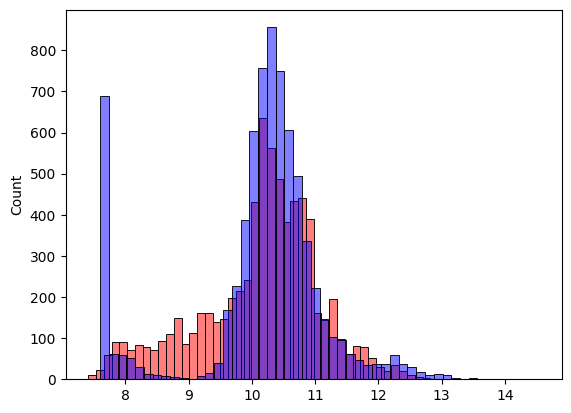

In [67]:
sns.histplot(y_pred, color="red", bins=50, alpha=0.5)
sns.histplot(y_train, color="blue", bins=50, alpha=0.5)

## 2.9 - Root Mean Squared Error

Provides a method of evaluating the model against actual results

$$ RMSE = \sqrt {\frac{1}{m} \sum_{i=1}^{m} (g(x_i) - y_i)^2} $$

In [68]:
# Find the distance between predicted values and actual values

In [ ]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()

    return np.sqrt(mse)

In [70]:
rmse(y_train, y_pred)

np.float64(0.5134876533319521)

## 2.10 Validating the Model

In [71]:
# We should apply the RMSE to the validation data rather than the training data to be more robust.

In [72]:
def prepare_X(df, base: list):
    df_num = df[base].fillna(0).values
    return df_num

In [73]:
# Training the model, using only training data
X_train_data = prepare_X(X_train, base)
X_train_data

w0, w = train_linear_regression(X_train_data, y_train)

w0, w

(np.float64(-178.91982969754915),
 array([ 9.33672412e-02,  3.69035484e-03,  7.82992358e-02, -2.44073072e-02,
        -2.94825756e-03,  1.09088611e-02, -4.80654588e-05]))

In [74]:
# Get the predictions of the Validation Data
X_val_data = prepare_X(X_val, base)
y_pred = w0 + X_val_data.dot(w)

y_pred

array([ 9.47009498,  9.71851049, 10.23586948, ..., 10.16847603,
       10.90115153,  9.82870604], shape=(2382,))

In [75]:
rmse(y_val, y_pred)

np.float64(0.5222970621783903)

## 2.11 - Simple Feature Engineering

In [76]:
X_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,kia,rondo,2008,regular unleaded,162.0,4.0,automatic,front wheel drive,4.0,0,compact,wagon,26,19,1720
1,subaru,legacy,2016,regular unleaded,175.0,4.0,automatic,all wheel drive,4.0,0,midsize,sedan,36,26,640
2,hyundai,veloster,2016,regular unleaded,132.0,4.0,manual,front wheel drive,3.0,hatchback,compact,2dr hatchback,35,27,1439
3,fiat,500,2017,premium unleaded (recommended),101.0,4.0,automatic,front wheel drive,2.0,hatchback,compact,2dr hatchback,33,27,819
4,lincoln,aviator,2005,premium unleaded (required),302.0,8.0,automatic,all wheel drive,4.0,luxury,midsize,4dr suv,16,11,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,chevy van,1998,regular unleaded,200.0,6.0,automatic,rear wheel drive,3.0,0,midsize,cargo van,18,13,1385
7146,subaru,xv crosstrek,2014,regular unleaded,160.0,4.0,automatic,all wheel drive,4.0,"crossover,hybrid",compact,4dr suv,33,29,640
7147,dodge,magnum,2006,regular unleaded,250.0,6.0,automatic,all wheel drive,4.0,0,large,wagon,22,15,1851
7148,honda,civic,2016,regular unleaded,174.0,4.0,automatic,front wheel drive,4.0,0,midsize,sedan,42,31,2202


In [77]:
base = ["engine_hp", "engine_cylinders", "number_of_doors", "highway_mpg", "city_mpg", "popularity"]
cur_year = X_train.year.max()
cur_year

np.int64(2017)

In [78]:
# Find the age of the car
cur_year - X_train.year

0        9
1        1
2        1
3        0
4       12
        ..
7145    19
7146     3
7147    11
7148     1
7149     2
Name: year, Length: 7150, dtype: int64

In [79]:
def prepare_X(df, base: list, cur_year: int):
    # Make a copy to not change original dataframe
    df = df.copy()
    
    df["age"] = cur_year - df.year
    base = base + ["age"]
    
    df_num = df[base].fillna(0).values
    return df_num

In [80]:
X_train_data = prepare_X(X_train, base, cur_year)
X_train_data

array([[1.620e+02, 4.000e+00, 4.000e+00, ..., 1.900e+01, 1.720e+03,
        9.000e+00],
       [1.750e+02, 4.000e+00, 4.000e+00, ..., 2.600e+01, 6.400e+02,
        1.000e+00],
       [1.320e+02, 4.000e+00, 3.000e+00, ..., 2.700e+01, 1.439e+03,
        1.000e+00],
       ...,
       [2.500e+02, 6.000e+00, 4.000e+00, ..., 1.500e+01, 1.851e+03,
        1.100e+01],
       [1.740e+02, 4.000e+00, 4.000e+00, ..., 3.100e+01, 2.202e+03,
        1.000e+00],
       [2.560e+02, 6.000e+00, 4.000e+00, ..., 2.000e+01, 6.400e+02,
        2.000e+00]], shape=(7150, 7))

In [81]:
# Training the model, using only training data
X_train_data = prepare_X(X_train, base, cur_year)
X_train_data

w0, w = train_linear_regression(X_train_data, y_train)

w0, w

(np.float64(9.401895802822239),
 array([ 3.69035484e-03,  7.82992358e-02, -2.44073072e-02, -2.94825756e-03,
         1.09088611e-02, -4.80654588e-05, -9.33672412e-02]))

In [82]:
# Get the predictions of the Validation Data
X_val_data = prepare_X(X_val, base, cur_year)
y_pred = w0 + X_val_data.dot(w)

y_pred

array([ 9.47009498,  9.71851049, 10.23586948, ..., 10.16847603,
       10.90115153,  9.82870604], shape=(2382,))

In [83]:
rmse(y_val, y_pred)

np.float64(0.5222970621780998)

<Axes: ylabel='Count'>

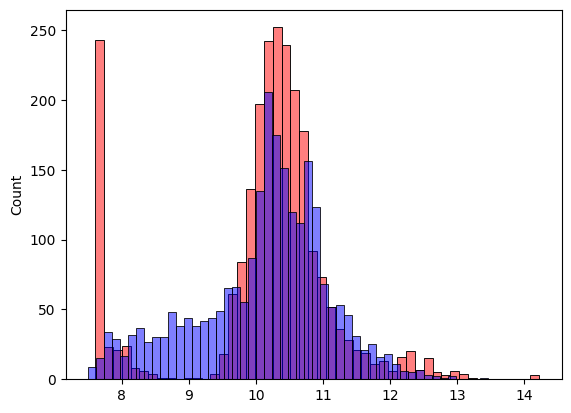

In [84]:
sns.histplot(y_val, color="red", bins=50, alpha=0.5)
sns.histplot(y_pred, color="blue", bins=50, alpha=0.5)

## 2.12 Categorical Variables

In [85]:
X_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [86]:
X_train.number_of_doors

0       4.0
1       4.0
2       3.0
3       2.0
4       4.0
       ... 
7145    3.0
7146    4.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [87]:
# We want to try to separate the number of doors column
(X_train.number_of_doors == 2).astype("int")

0       0
1       0
2       0
3       1
4       0
       ..
7145    0
7146    0
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

In [88]:
door_types = X_train.number_of_doors.unique()
door_types

array([4., 3., 2., 0.])

In [89]:
for doors in door_types:
    X_train[f"num_doors_{(int)(doors)}"] = (X_train.number_of_doors == doors).astype("int")

In [90]:
X_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_4,num_doors_3,num_doors_2,num_doors_0
0,kia,rondo,2008,regular unleaded,162.0,4.0,automatic,front wheel drive,4.0,0,compact,wagon,26,19,1720,1,0,0,0
1,subaru,legacy,2016,regular unleaded,175.0,4.0,automatic,all wheel drive,4.0,0,midsize,sedan,36,26,640,1,0,0,0
2,hyundai,veloster,2016,regular unleaded,132.0,4.0,manual,front wheel drive,3.0,hatchback,compact,2dr hatchback,35,27,1439,0,1,0,0
3,fiat,500,2017,premium unleaded (recommended),101.0,4.0,automatic,front wheel drive,2.0,hatchback,compact,2dr hatchback,33,27,819,0,0,1,0
4,lincoln,aviator,2005,premium unleaded (required),302.0,8.0,automatic,all wheel drive,4.0,luxury,midsize,4dr suv,16,11,61,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,chevy van,1998,regular unleaded,200.0,6.0,automatic,rear wheel drive,3.0,0,midsize,cargo van,18,13,1385,0,1,0,0
7146,subaru,xv crosstrek,2014,regular unleaded,160.0,4.0,automatic,all wheel drive,4.0,"crossover,hybrid",compact,4dr suv,33,29,640,1,0,0,0
7147,dodge,magnum,2006,regular unleaded,250.0,6.0,automatic,all wheel drive,4.0,0,large,wagon,22,15,1851,1,0,0,0
7148,honda,civic,2016,regular unleaded,174.0,4.0,automatic,front wheel drive,4.0,0,midsize,sedan,42,31,2202,1,0,0,0


In [91]:
del X_train["num_doors_4"]
del X_train["num_doors_3"]
del X_train["num_doors_2"]
del X_train["num_doors_0"]


In [92]:
def prepare_X(df, base: list, cur_year: int):
    # Make a copy to not change original dataframe
    df = df.copy()
    features = base.copy()
    
    df["age"] = cur_year - df.year
    features = features + ["age"]

    # Add number of doors as a trainable feature

    df = df.fillna(0)
    
    #door_types = df.number_of_doors.unique()
    #for doors in door_types:
    #    col_name = f"num_doors_{(int)(doors)}" 
    #    df[col_name] = (df.number_of_doors == doors).astype("int")
    #    features = features + [col_name]

    makes = list(df.make.value_counts().head().index)
    for m in makes:
        col_name = f"make_{m}" 
        df[col_name] = (df.make == m).astype("int")
        features = features + [col_name]

    df_num = df[features]
    df_num = df_num.fillna(0).values
    return df_num

In [93]:
prepare_X(X_train, base, 2017)

array([[162.,   4.,   4., ...,   0.,   0.,   0.],
       [175.,   4.,   4., ...,   0.,   0.,   0.],
       [132.,   4.,   3., ...,   0.,   0.,   0.],
       ...,
       [250.,   6.,   4., ...,   0.,   0.,   1.],
       [174.,   4.,   4., ...,   0.,   0.,   0.],
       [256.,   6.,   4., ...,   0.,   0.,   0.]], shape=(7150, 12))

In [94]:
X_train_data = prepare_X(X_train, base, cur_year)
w0, w = train_linear_regression(X_train_data, y_train)

X_val_data = prepare_X(X_val, base, cur_year)
y_pred = w0 + X_val_data.dot(w)

rmse(y_val, y_pred)

np.float64(0.5121870381380089)

In [95]:
makes = list(df.make.value_counts().head().index)

In [96]:
X_train_data = prepare_X(X_train, base, cur_year)
X_train_data

array([[162.,   4.,   4., ...,   0.,   0.,   0.],
       [175.,   4.,   4., ...,   0.,   0.,   0.],
       [132.,   4.,   3., ...,   0.,   0.,   0.],
       ...,
       [250.,   6.,   4., ...,   0.,   0.,   1.],
       [174.,   4.,   4., ...,   0.,   0.,   0.],
       [256.,   6.,   4., ...,   0.,   0.,   0.]], shape=(7150, 12))

In [97]:
X_train_data = prepare_X(X_train, base, cur_year)
w0, w = train_linear_regression(X_train_data, y_train)

X_val_data = prepare_X(X_val, base, cur_year)
y_pred = w0 + X_val_data.dot(w)

rmse(y_val, y_pred)

np.float64(0.5121870381380089)

In [98]:
X_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [99]:
categorical_variables = X_train.dtypes[X_train.dtypes == "object"].index
categorical_variables

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [100]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [101]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado 1500',
  'tundra',
  'f-150',
  'sierra 1500',
  'beetle convertible'],
 'engine_fuel_type': ['regular unleaded',
  'premium unleaded (required)',
  'premium unleaded (recommended)',
  'flex-fuel (unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front wheel drive',
  'rear wheel drive',
  'all wheel drive',
  'four wheel drive'],
 'market_category': ['crossover',
  'flex fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr suv',
  'coupe',
  'convertible',
  '4dr hatchback']}

In [102]:
def prepare_X(df, base: list, cur_year: int, categories):
    # Make a copy to not change original dataframe
    df = df.copy()
    features = base.copy()
    
    df["age"] = cur_year - df.year
    features = features + ["age"]

    # Add number of doors as a trainable feature

    df = df.fillna(0)
    
    for c, values in categories.items():
        for v in values:
            col_name = f"{c}_{v}" 
            df[col_name] = (df[c] == v).astype("int")
            features.append(col_name)
            

    df_num = df[features]
    df_num = df_num.fillna(0).values
    return df_num

In [103]:
X_train_data = prepare_X(X_train, base, cur_year, categories)
w0, w = train_linear_regression(X_train_data, y_train)

X_val_data = prepare_X(X_val, base, cur_year, categories)
y_pred = w0 + X_val_data.dot(w)

# This now gives a HUGE RMSE
rmse(y_val, y_pred)

np.float64(225.28390018211675)

In [104]:
int(w0)

-29171363490268660

## 2.13 - Regularisation

$w = (X^TX)^{-1}\dot X^Ty $

In [106]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5]
]
X= np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [112]:
y = [1,2,3,1,2,3]

In [109]:
# We see that the 2nd and third columns have the same values
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [111]:
# Inverse does not exist, can't find inverse
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [120]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5.0000001]
]

X = np.array(X)

In [121]:
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [122]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.92646538e-02, -1.54615164e+05,  1.54615121e+05],
       [-1.54615170e+05,  3.51843724e+13, -3.51843721e+13],
       [ 1.54615129e+05, -3.51843721e+13,  3.51843718e+13]])

In [124]:
w = XTX_inv.dot(X.T).dot(y)
w

array([ 2.73776578e-01, -4.41093100e+06,  4.41093113e+06])

In [125]:
# To get around these issues, we can add a value to the diagonal of XTX
XTX = [
    [1, 2, 2],
    [2,1,1],
    [2,1,1]
]
XTX = np.array(XTX)

In [126]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [128]:
XTX = XTX +  0.001 * np.eye(3)

In [129]:
XTX

array([[1.001, 2.   , 2.   ],
       [2.   , 1.001, 1.   ],
       [2.   , 1.   , 1.001]])

In [130]:
np.linalg.inv(XTX)

array([[-3.33666889e-01,  3.33500139e-01,  3.33500139e-01],
       [ 3.33500139e-01,  4.99916542e+02, -5.00083458e+02],
       [ 3.33500139e-01, -5.00083458e+02,  4.99916542e+02]])

In [134]:
def train_linear_regression_reg(X, y, r=0.001):
    # If the X matrix does not contain ones, we need to add a column at the start
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)

    XTX = XTX + r  * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)

    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]
    

In [135]:
X_train_data = prepare_X(X_train, base, cur_year, categories)
w0, w = train_linear_regression_reg(X_train_data, y_train, 0.01)

X_val_data = prepare_X(X_val, base, cur_year, categories)
y_pred = w0 + X_val_data.dot(w)

# This now gives a HUGE RMSE
rmse(y_val, y_pred)

np.float64(0.4637440243417758)

## 2.14 - Tuning the Model

In [152]:
scores = []
r_values = [10, 1, 0.01, 0.001, 0.0001, 0.00001, 0.0000001, 0.000000001, 0.0000000001]
for r in r_values:
    X_train_data = prepare_X(X_train, base, cur_year, categories)
    w0, w = train_linear_regression_reg(X_train_data, y_train, r)
    
    X_val_data = prepare_X(X_val, base, cur_year, categories)
    y_pred = w0 + X_val_data.dot(w)
    
    # This now gives a HUGE RMSE
    score = rmse(y_val, y_pred)
    scores.append(score)
    print(f"r: {r}")
    print(f"RMSE: {score}")
    print(f"w0: {w0}")
    print()

r: 10
RMSE: 0.47670345057488966
w0: 4.5115805479029625

r: 1
RMSE: 0.46382838407256427
w0: 5.61362603040108

r: 0.01
RMSE: 0.4637440243417758
w0: 5.812525434597438

r: 0.001
RMSE: 0.4637466108030945
w0: 5.815246717045377

r: 0.0001
RMSE: 0.46374687134694226
w0: 5.683265381737051

r: 1e-05
RMSE: 0.4637469445411166
w0: 16.390292015728946

r: 1e-07
RMSE: 0.4637461708129778
w0: 39010.64105594793

r: 1e-09
RMSE: 0.4635354055423566
w0: -1082437998.1773887

r: 1e-10
RMSE: 0.47058373982356383
w0: -71011459009.21753



<Axes: >

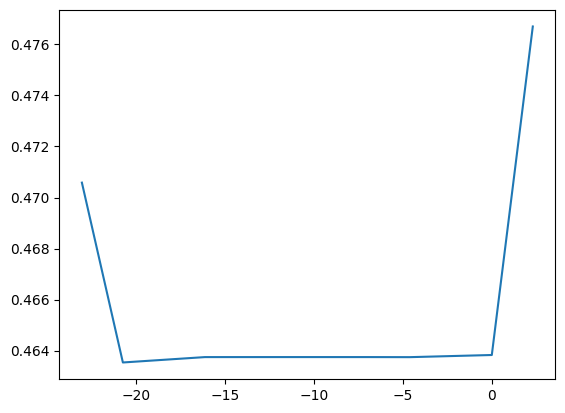

In [157]:
sns.lineplot(x=np.log(r_values), y=scores)

## 2.15 - Using the Model

Train the model using the training data, fine tine the model using the validation data and then test it on the test data

In [159]:
df_full_train = pd.concat([X_train, X_val])
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,kia,rondo,2008,regular unleaded,162.0,4.0,automatic,front wheel drive,4.0,0,compact,wagon,26,19,1720
1,subaru,legacy,2016,regular unleaded,175.0,4.0,automatic,all wheel drive,4.0,0,midsize,sedan,36,26,640
2,hyundai,veloster,2016,regular unleaded,132.0,4.0,manual,front wheel drive,3.0,hatchback,compact,2dr hatchback,35,27,1439
3,fiat,500,2017,premium unleaded (recommended),101.0,4.0,automatic,front wheel drive,2.0,hatchback,compact,2dr hatchback,33,27,819
4,lincoln,aviator,2005,premium unleaded (required),302.0,8.0,automatic,all wheel drive,4.0,luxury,midsize,4dr suv,16,11,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,infiniti,q50,2015,premium unleaded (recommended),328.0,6.0,automatic,all wheel drive,4.0,"luxury,high-performance",midsize,sedan,27,19,190
2378,chevrolet,silverado 1500,2015,flex-fuel (unleaded/e85),285.0,6.0,automatic,four wheel drive,2.0,flex fuel,large,regular cab pickup,22,17,1385
2379,ford,fiesta,2016,regular unleaded,197.0,4.0,manual,front wheel drive,4.0,"hatchback,factory tuner,performance",compact,4dr hatchback,32,26,5657
2380,mercedes-benz,e-class,2016,premium unleaded (required),302.0,6.0,automatic,all wheel drive,4.0,"luxury,performance",midsize,sedan,28,20,617


In [161]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,kia,rondo,2008,regular unleaded,162.0,4.0,automatic,front wheel drive,4.0,0,compact,wagon,26,19,1720
1,subaru,legacy,2016,regular unleaded,175.0,4.0,automatic,all wheel drive,4.0,0,midsize,sedan,36,26,640
2,hyundai,veloster,2016,regular unleaded,132.0,4.0,manual,front wheel drive,3.0,hatchback,compact,2dr hatchback,35,27,1439
3,fiat,500,2017,premium unleaded (recommended),101.0,4.0,automatic,front wheel drive,2.0,hatchback,compact,2dr hatchback,33,27,819
4,lincoln,aviator,2005,premium unleaded (required),302.0,8.0,automatic,all wheel drive,4.0,luxury,midsize,4dr suv,16,11,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,infiniti,q50,2015,premium unleaded (recommended),328.0,6.0,automatic,all wheel drive,4.0,"luxury,high-performance",midsize,sedan,27,19,190
9528,chevrolet,silverado 1500,2015,flex-fuel (unleaded/e85),285.0,6.0,automatic,four wheel drive,2.0,flex fuel,large,regular cab pickup,22,17,1385
9529,ford,fiesta,2016,regular unleaded,197.0,4.0,manual,front wheel drive,4.0,"hatchback,factory tuner,performance",compact,4dr hatchback,32,26,5657
9530,mercedes-benz,e-class,2016,premium unleaded (required),302.0,6.0,automatic,all wheel drive,4.0,"luxury,performance",midsize,sedan,28,20,617


In [162]:
X_full_train = prepare_X(df_full_train, base, cur_year, categories)

In [163]:
X_full_train

array([[162.,   4.,   4., ...,   0.,   0.,   0.],
       [175.,   4.,   4., ...,   0.,   0.,   0.],
       [132.,   4.,   3., ...,   0.,   0.,   0.],
       ...,
       [197.,   4.,   4., ...,   0.,   0.,   1.],
       [302.,   6.,   4., ...,   0.,   0.,   0.],
       [210.,   6.,   4., ...,   0.,   0.,   0.]], shape=(9532, 44))

In [165]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.70479268, 10.09187401,  9.79818259, ...,  9.97399261,
       10.92595647, 10.13701698], shape=(9532,))

In [168]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.000000001)
w0, w

(np.float64(-1126554256.5483444),
 array([ 1.70511724e-03,  1.14884680e-01,  8.04918538e-02, -5.82433883e-03,
        -6.28364967e-03, -6.11026439e-05, -9.66854593e-02, -4.99102729e-02,
         2.17149005e-01,  3.16965661e-02,  5.97333918e-03, -1.10664889e-01,
        -1.88536001e-01, -5.72221542e-01, -2.16385577e-01, -2.83628057e-01,
        -3.43415252e-01, -3.95384011e-01,  1.32568687e-01, -2.61963349e-01,
        -4.84922438e-01,  1.66416083e-02,  8.38796855e+08,  8.38796855e+08,
         8.38796855e+08,  8.38796857e+08,  8.38796855e+08,  2.87757410e+08,
         2.87757410e+08,  2.87757410e+08,  2.87757410e+08, -8.43651301e-02,
         1.00649219e-01, -2.91670387e-02, -3.66119217e-03, -2.65627635e-02,
         1.99841326e+00,  1.87651027e+00,  1.90915877e+00, -4.93766263e-02,
         2.80423577e-02,  1.99879986e-01,  3.82587352e-01, -1.53777780e-01]))

In [172]:
X_test_data = prepare_X(X_test, base, cur_year, categories)
y_pred = w0 + X_test_data.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.4630717527742626)

Now we want to use the model to predict the price of a car

In [175]:
car = X_test.iloc[20].to_dict()
car

{'make': 'acura',
 'model': 'ilx',
 'year': 2017,
 'engine_fuel_type': 'premium unleaded (recommended)',
 'engine_hp': 201.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automated_manual',
 'driven_wheels': 'front wheel drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury',
 'vehicle_size': 'compact',
 'vehicle_style': 'sedan',
 'highway_mpg': 35,
 'city_mpg': 25,
 'popularity': 204}

In [181]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,acura,ilx,2017,premium unleaded (recommended),201.0,4.0,automated_manual,front wheel drive,4.0,luxury,compact,sedan,35,25,204


In [182]:
X_small = prepare_X(df_small, base, cur_year, categories)

In [185]:
y_pref = w0 + X_small.dot(w)
log_price = y_pred[0]

In [186]:
pred_price = np.expm1(log_price)
pred_price

np.float64(22984.48651596519)

In [187]:
actual_price = y_test[20]
np.expm1(actual_price)

np.float64(29289.999999999978)